<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each
* Savings: Reuse the first stage. Determine if the first stage will land to determine the cost of a launch. 
* Landing Prediction Use: If Space Y wants to bid against Space X for a rocket launch.   
* Predict Landing Outcome: Build and evaluate machine learning models to classify/predict landing outcome based on available data -> Output: Choose the best model to predict first stage landing = Choose best model to predict savings and the to aid in Space Y choice to bid

Perform EDA Exploratory Data Analysis & determine which Training Labels

*   Create a column for the class
*   Standardize the data
*   Split into training data and test data

Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method that performs best using test data


***


## Import Libraries and Define Auxiliary Functions


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standardize our data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier


In [3]:
from sklearn.metrics import classification_report

In [4]:
# This function is to plot the confusion matrix

def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load the dataframe


In [5]:
# load the data
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# option 2 if above does not load
# data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [41]:
# load one-hot encoded data to X
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

# plan b
# X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_3.csv')

X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [43]:
X.columns
# v1
# insert best parameters identified with GridSearchCV
classifiers = [
    LogisticRegression(C = 0.01, penalty = 'l2', solver = 'lbfgs'),
    SVC(C = 1.0, gamma = 0.03162277660168379, kernel = 'sigmoid'),
    DecisionTreeClassifier(criterion = 'gini', max_depth = 8, max_features = 'sqrt', min_samples_leaf = 4, min_samples_split = 5, splitter = 'random'),
    KNeighborsClassifier(algorithm = 'auto', n_neighbors = 10, p = 1),
]

for clf in classifiers:
    clf.fit(X_train, Y_train)
    yhat = clf.predict(X_test)
    print(classification_report(Y_test, yhat))

Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [7]:
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

## TASK  2


In [8]:
# Standardize the data in X then reassign it to the variable X 
## StandardScaler standardizes a feature by removing the mean and dividing each value by the standard deviation. 
## Results in a distribution with a standard deviation equal to 1 (and variance equal to 1). 
## If you have outliers in your feature (column), normalizing your data will scale most of the data to a small interval. 
## use when: you need to transform a feature has zero mean and unit standard deviation.

#create standardscaler object
transform = preprocessing.StandardScaler()
# fit and transform the data
X = transform.fit_transform(X)
# X -> numpy array now too, just like Y
# train_test_split arguments are to be arrays
X

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## train_test_split


In [ ]:
# split X and Y into training and test data, 20% to test / 80% to train, random state 2
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [9]:
# version 2
# split X and Y into training and test data, 30% to test / 70% to train, random state 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
# now X_train, X_test, Y_train, Y_test are:
## arrays of integers with dimensions...
#print('Dimensions of X_train, X_test, Y_train, Y_test:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
### we only have 18 test samples! (well, that's 20%)

In [10]:
# version 2
# now X_train, X_test, Y_train, Y_test are:
## arrays of integers with dimensions...
print('Dimensions of X_train, X_test, Y_train, Y_test:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


Dimensions of X_train, X_test, Y_train, Y_test: (63, 83) (27, 83) (63,) (27,)


## Logistic Regression


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [11]:
parameters ={'C':[0.01,0.1,1],'penalty':['l2'],'solver':['lbfgs']} # l1 lasso l2 ridge
# create logistic regression object
lr=LogisticRegression()
# create a gridsearchcv object from lr object
# cv = 10 = 10 folds
logreg_cv = GridSearchCV(lr, param_grid = parameters, cv = 10)
# fit the gridsearchcv object
logreg_cv.fit(X_train, Y_train)
## output the GridSearchCV object for logistic regression

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [12]:
# find the best parameters from parameters
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8119047619047619


In [13]:
# Calculate the accuracy on the test data - method score
logreg_cv_test_score = logreg_cv.score(X_test, Y_test)
logreg_cv_test_score

0.8888888888888888

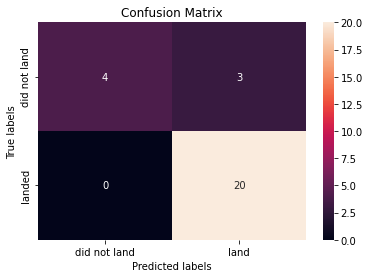

In [16]:
# Confusion matrix (using logreg_cv = using new and improved lr)
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [19]:
cm_lr = confusion_matrix(Y_test,yhat)
df_lr = pd.DataFrame(cm_lr)

## Support Vector Machine

In [20]:
# define parameters to test in a dictionary
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),'C': np.logspace(-3, 3, 5),'gamma':np.logspace(-3, 3, 5)}
# create a support vector machine object
svm = SVC()
# create a gridsearchcv object svm_cv with cv=10 = 10 folds, and fit to find the best parameters from parameters
svm_cv = GridSearchCV(svm, param_grid = parameters, cv = 10)
# fit the gridsearchcv object
svm_cv.fit(X_train, Y_train)
## output the GridSearchCV object for support vector machine

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [21]:
# find the best parameters from parameters
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8142857142857143


In [22]:
# Calculate the accuracy on the test data - method score
svm_test_score = svm_cv.score(X_test, Y_test)
svm_test_score

0.8888888888888888

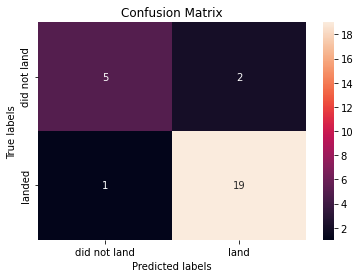

In [23]:
# plot confusion matrix
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [26]:
cm_svm = confusion_matrix(Y_test,yhat)
df_svm = pd.DataFrame(cm_svm)

## Decision Tree Classifier

Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [27]:
# define parameters to test in a dictionary
parameters = {'criterion': ['gini', 'entropy'],'splitter': ['best', 'random'],'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],'min_samples_leaf': [1, 2, 4],'min_samples_split': [2, 5, 10]}
# create a decision tree classifier object
tree = DecisionTreeClassifier()
# create a gridsearchcv object tree_cv with cv=10 = 10 folds, and fit to find the best parameters from parameters
tree_cv = GridSearchCV(tree, param_grid = parameters, cv = 10)
# fit the gridsearchcv object to train data
tree_cv.fit(X_train, Y_train)
## output the GridSearchCV object for decision tree classifier

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [29]:
# find the best parameters from parameters
print("tuned hyperparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.8952380952380953


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [30]:
# Calculate the accuracy on the test data - method score
tree_test_score = tree_cv.score(X_test, Y_test)
tree_test_score

0.8888888888888888

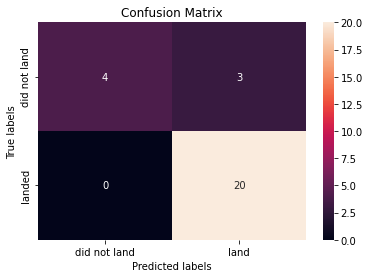

In [31]:
# plot confusion matrix
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [33]:
cm_tree = confusion_matrix(Y_test,yhat)
df_tree = pd.DataFrame(cm_tree)

## k Nearest Neighbors


In [34]:
# define parameters to test in a dictionary
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
# create a k nearest neighbor object
KNN = KNeighborsClassifier()
# create a gridsearchcv object knn_cv with cv=10 = 10 folds, and fit to find the best parameters from parameters
knn_cv = GridSearchCV(KNN, param_grid = parameters, cv = 10)
# fit the gridsearchcv object to train data
knn_cv.fit(X_train, Y_train)
## output the GridSearchCV object for k nearest neighbor classifier

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [35]:
# find the best parameters from parameters 
print("tuned hyperparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
accuracy : 0.830952380952381


In [36]:
# Calculate the accuracy on the test data - method score
knn_test_score = knn_cv.score(X_test, Y_test)
knn_test_score

0.8888888888888888

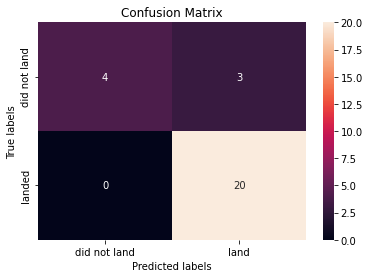

In [37]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [38]:
cm_knn = confusion_matrix(Y_test,yhat)
df_knn = pd.DataFrame(cm_knn)

# Find the method that performs best


# V2 Confusion Matrix
*Differs* between models
* for log reg, tree and knn:
* false positives: 3 *predicted to land, but failed
* false negatives: 0 *predicted to fail, but landed
* for svm:
* false positives: 2 *predicted to land, but failed
* false negatives: 1 *predicted to fail, but landed

* Support Vector Machine showed superior perfomance on *test* data with respect to not missing failure to land

* Train data accuracy: KNN 83.1% - tree 89.5% - svm 81.4% - log reg 81.2%
* GridSearchCV model accuracy: average of all cv folds for a single combination of the parameters, best_params_ = parameters setting that gave the best results on the hold out data, best_score_ = mean cross-validated score of the best_estimator (the estimator that was chosen by the search)

* Test Grid Accuracy: Same for all models: 88.8% (vs 83.3% with V1)

In [39]:
# v2
# insert best parameters identified with GridSearchCV
classifiers = [
    LogisticRegression(C = 0.01, penalty = 'l2', solver = 'lbfgs'),
    SVC(C = 1.0, gamma = 0.03162277660168379, kernel = 'sigmoid'),
    DecisionTreeClassifier(criterion = 'gini', max_depth = 6, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 5, splitter = 'random'),
    KNeighborsClassifier(algorithm = 'auto', n_neighbors = 5, p = 1),
]

for clf in classifiers:
    clf.fit(X_train, Y_train)
    yhat = clf.predict(X_test)
    print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.87      1.00      0.93        20

    accuracy                           0.89        27
   macro avg       0.93      0.79      0.83        27
weighted avg       0.90      0.89      0.88        27

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.90      0.95      0.93        20

    accuracy                           0.89        27
   macro avg       0.87      0.83      0.85        27
weighted avg       0.89      0.89      0.89        27

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.87      1.00      0.93        20

    accuracy                           0.89        27
   macro avg       0.93      0.79      0.83        27
weighted avg       0.90      0.89      0.88        27

              preci

# V2: Results
Precision: SVM vs other models: .90 SVM vs .87
* SVM 90% of predictions were correct, greater accuracy of positive predictions (TP/(TP + FP))
* SVM showed greater ability to *not* label an instance success (1) this is actually failure to land (0)

Recall: SVM vs other models: .95 SVM vs 1.00
* SVM 95% of successful landings were caught, less ability to find all positive instances (TP/(TP+FN))
* However recall in terms of predicting failure to land: .71 SVM vs .57
* SVM showed greater ability to find all failures to land successfully

F1 score: SVM vs other models: .89 SVM vs .88 
* SVM weighted harmonic mean of precision and recall was closer to a perfect 1.0
* While global accuracy (percent of correct landing predictions) was equivalent for all models (89%), it is more appropriate to compare models on the weighted average of F1, as this takes into account the benefit (reduced risk) of having a superior F1 score for failure to land (SVM .77 vs .73)

# Best Model = Support Vector Machine 
* parameters: 
* C = 1.0
* gamma = 0.03162277660168379
* kernel = 'sigmoid'

### V1 

Confusion Matrix: Same for all grid models
[[TN FP]
[ FN TP]]
* false positives: 3 
*predicted to land, but failed
* false negatives: 0 
*predicted to fail, but landed

*Train* data accuracy: KNN 84.8% - tree 88.6% - svm 84.8% - log reg 84.6%
*GridSearchCV model accuracy: average of all cv folds for a single combination of the parameters
*best_params_ = parameters setting that gave the best results on the hold out data
*best_score_ = mean cross-validated score of the best_estimator (the estimator that was chosen by the search)

*Test* Grid Accuracy: Same for all models: 83.3%
*GridSearchCV model test data predictions
*accuracy score on those predictions 

Classification Reports: Same for all models

### See V2 - Why?
* Evalutation on *test* data was the *same* for all models, this includes: confusion matrix (FN and FP), accuracy, classification report (precision, recall, F1 score)
* V2 goal: differentiate between models in respect to performance while still building a model for effective predictions
* V2 change: test size increased to 30% from 20%

In [ ]:
# v1
# insert best parameters identified with GridSearchCV
#classifiers = [
#    LogisticRegression(C = 0.01, penalty = 'l2', solver = 'lbfgs'),
#    SVC(C = 1.0, gamma = 0.03162277660168379, kernel = 'sigmoid'),
#    DecisionTreeClassifier(criterion = 'gini', max_depth = 8, max_features = 'sqrt', min_samples_leaf = 4, min_samples_split = 5, splitter = 'random'),
#    KNeighborsClassifier(algorithm = 'auto', n_neighbors = 10, p = 1),
#]

#for clf in classifiers:
#    clf.fit(X_train, Y_train)
#    yhat = clf.predict(X_test)
#    print(classification_report(Y_test, yhat))

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By    | Change Description      |
| ----------------- | ------- | ------------- | ----------------------- |
| 2021-08-31        | 1.1     | Lakshmi Holla | Modified markdown       |
| 2020-09-20        | 1.0     | Joseph        | Modified Multiple Areas |


Copyright © 2020 IBM Corporation. All rights reserved.
